In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from glob import glob
from tqdm import tqdm

In [23]:
df = pd.read_csv('tardis_data/combined/NEXOUSDT_2024_Q1.csv.gz', compression='gzip')

# Drop unused columns
df = df.drop(columns=['exchange', 'local_timestamp', 'id'])

# Convert timestamp from microseconds
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='us')

# Reorder columns
df = df[['timestamp', 'symbol', 'side', 'price', 'amount']]

# Set timestamp as index
df = df.set_index('timestamp').sort_index()

# Resample to 1-minute intervals
df_1min = df.resample('5min').agg({
    'price': 'last',
    'amount': 'sum',
    'side': 'last',
    'symbol': 'last'
}).dropna().reset_index()

In [24]:
df_1min

,timestamp,price,amount,side,symbol
0,2024-01-01 00:00:00,0.851,3270.25,buy,NEXOUSDT
1,2024-01-01 00:05:00,0.854,2712.65,buy,NEXOUSDT
2,2024-01-01 00:10:00,0.854,4290.40,buy,NEXOUSDT
3,2024-01-01 00:15:00,0.852,467.27,sell,NEXOUSDT
4,2024-01-01 00:20:00,0.852,3068.12,buy,NEXOUSDT
...,...,...,...,...,...
51909,2024-06-29 23:35:00,1.176,59.61,sell,NEXOUSDT
51910,2024-06-29 23:40:00,1.176,121.11,sell,NEXOUSDT
51911,2024-06-29 23:45:00,1.176,338.46,sell,NEXOUSDT
51912,2024-06-29 23:50:00,1.176,336.05,sell,NEXOUSDT


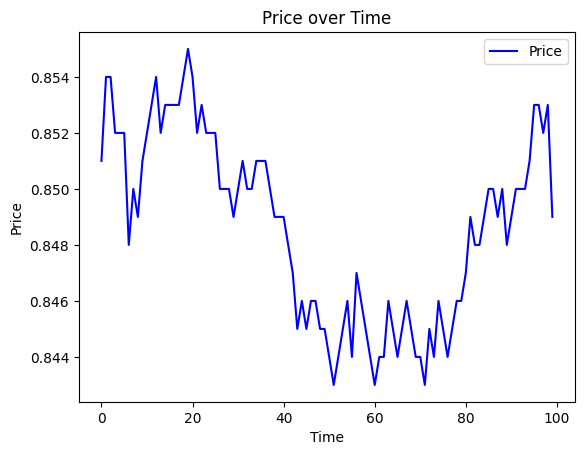

In [25]:
plt.plot(df_1min['price'].head(100), color='blue', label='Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price over Time')
plt.legend()
plt.show()

In [108]:
df_liquid = pd.read_csv('tardis_data/combined/NEXOUSDT_2024_Q1.csv.gz', compression='gzip')

# Drop unused columns
df_liquid = df_liquid.drop(columns=['exchange', 'local_timestamp', 'id'])

# Convert timestamp from microseconds
df_liquid['timestamp'] = pd.to_datetime(df_liquid['timestamp'], unit='us')

# Reorder columns
df_liquid = df_liquid[['timestamp', 'symbol', 'side', 'price', 'amount']]

# Set timestamp as index
df_liquid = df_liquid.set_index('timestamp').sort_index()

# Resample to 1-minute intervals
df_liquid_1min = df_liquid.resample('5min').agg({
    'price': 'last',
    'amount': 'sum',
    'side': 'last',
    'symbol': 'last'
}).dropna().reset_index()

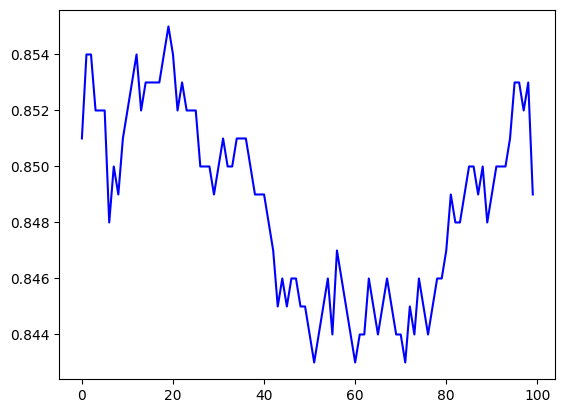

In [109]:
plt.plot(df_liquid_1min['price'].head(100), color='blue', label='Price')

In [86]:
#Count the number of times the price does not change over a 1-minute, 2-minute, and 5-minute interval

# Count 1-minute price holds
df_1m = df.set_index('timestamp').resample('1min').last().dropna().reset_index()
no_change_1m = (df['price'].diff() == 0).sum()

# Count 3-minute price holds
df_3m = df.set_index('timestamp').resample('3min').last().dropna().reset_index()
no_change_3m = (df_3m['price'].diff() == 0).sum()

# Count 5-minute price holds
df_5m = df.set_index('timestamp').resample('5min').last().dropna().reset_index()
no_change_5m = (df_5m['price'].diff() == 0).sum()

#Count 30-minute price holds
df_30m = df.set_index('timestamp').resample('30min').last().dropna().reset_index()
no_change_30m = (df_30m['price'].diff() == 0).sum()

print(f"Price unchanged:")
print(f"  Over 1-minute intervals: {no_change_1m}")
print(f"  Over 3-minute intervals: {no_change_3m}")
print(f"  Over 5-minute intervals: {no_change_5m}")
print(f"  Over 30-minute intervals: {no_change_30m}")


Price unchanged:
  Over 1-minute intervals: 1346219
  Over 3-minute intervals: 33961
  Over 5-minute intervals: 17996
  Over 30-minute intervals: 1675


In [87]:
df_1m

,timestamp,symbol,side,price,amount,usd_volume
0,2024-01-01 00:00:00,PAXGUSDT,buy,2028.0,0.0187,37.9236
1,2024-01-01 00:01:00,PAXGUSDT,buy,2029.0,0.0028,5.6812
2,2024-01-01 00:04:00,PAXGUSDT,buy,2029.0,0.0100,20.2900
3,2024-01-01 00:05:00,PAXGUSDT,buy,2029.0,0.0073,14.8117
4,2024-01-01 00:06:00,PAXGUSDT,buy,2029.0,0.0028,5.6812
...,...,...,...,...,...,...
217694,2024-06-29 23:43:00,PAXGUSDT,buy,2309.0,0.0279,64.4211
217695,2024-06-29 23:46:00,PAXGUSDT,sell,2308.0,0.0025,5.7700
217696,2024-06-29 23:48:00,PAXGUSDT,sell,2308.0,0.0086,19.8488
217697,2024-06-29 23:56:00,PAXGUSDT,sell,2308.0,0.1402,323.5816


In [88]:
df

,timestamp,symbol,side,price,amount,usd_volume
0,2024-01-01 00:00:06.390,PAXGUSDT,sell,2027.0,0.0060,12.1620
1,2024-01-01 00:00:07.406,PAXGUSDT,buy,2028.0,0.0028,5.6784
2,2024-01-01 00:00:11.531,PAXGUSDT,buy,2028.0,0.0210,42.5880
3,2024-01-01 00:00:40.645,PAXGUSDT,buy,2028.0,0.0187,37.9236
4,2024-01-01 00:01:26.357,PAXGUSDT,buy,2028.0,0.0080,16.2240
...,...,...,...,...,...,...
2015755,2024-06-29 23:56:39.980,PAXGUSDT,sell,2308.0,0.1402,323.5816
2015756,2024-06-29 23:57:20.850,PAXGUSDT,buy,2309.0,0.0050,11.5450
2015757,2024-06-29 23:57:59.629,PAXGUSDT,sell,2308.0,0.0872,201.2576
2015758,2024-06-29 23:57:59.629,PAXGUSDT,sell,2308.0,0.1400,323.1200


In [28]:
def combine_tardis_trades(file_paths, output_path=None):
    """
    Combines multiple Tardis trades files (compressed .csv.gz) into a single DataFrame
    with 1-minute resampled last prices for each symbol.

    Parameters:
    - file_paths (list): List of full paths to the .csv.gz files.
    - output_path (str, optional): Path to save the final combined CSV file.

    Returns:
    - pd.DataFrame: Combined DataFrame with timestamp and resampled price columns per symbol.
    """

    resampled_dfs = []

    print("📊 Processing trade files:")
    for file_path in tqdm(file_paths, desc="Files processed"):
        # Read file
        df = pd.read_csv(file_path, compression='gzip')

        # Drop unused columns
        df = df.drop(columns=['exchange', 'local_timestamp', 'id'])

        # Convert timestamp from microseconds
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='us')

        # Reorder columns
        df = df[['timestamp', 'symbol', 'side', 'price', 'amount']]

        # Set timestamp as index
        df = df.set_index('timestamp').sort_index()

        # Resample to 1-minute intervals
        df_1min = df.resample('5min').agg({
            'price': 'last',
            'amount': 'sum',
            'side': 'last',
            'symbol': 'last'
        }).dropna().reset_index()

        # Rename price column to last_price
        df_1min = df_1min.rename(columns={'price': 'last_price'})

        # Rename for final merge: SYMBOL/USDT_2024_1m
        symbol = df_1min['symbol'].iloc[0]
        df_1min = df_1min.rename(columns={'last_price': f'{symbol}_2024_5m'})

        # Reduce to timestamp + price column
        df_1min = df_1min[['timestamp', f'{symbol}_2024_5m']]

        # Store for merging later
        resampled_dfs.append(df_1min)

    print("🔗 Merging DataFrames...")
    df_combined = reduce(lambda left, right: pd.merge(left, right, on='timestamp', how='inner'), resampled_dfs)

    if output_path:
        df_combined.to_csv(output_path, index=False, compression='gzip')
        print(f"✅ Final combined file saved to {output_path}")

    return df_combined


In [104]:
#Create a function to calculate the daily average trading volume for each ticker

def calculate_average_daily_volume(file_paths, output_path=None):

    """
    Calculates the daily average trading volume for each ticker from multiple Tardis trades files.

    Parameters:
    - file_paths (list): List of full paths to the .csv.gz files.
    - output_path (str, optional): Path to save the final combined CSV file.

    Returns:
    - pd.DataFrame: DataFrame with daily average volume for each ticker.
    """

    average_daily_volumes = []

    print("📊 Processing trade files for daily volume:")
    for file_path in tqdm(file_paths, desc="Files processed"):

        #Create a DataFrame with the ticker name and average daily volume
        ticker = file_path.split('/')[-1].split('_')[0]

        print("PROCESSING TICKER :", ticker)

        # Read file
        df = pd.read_csv(file_path, compression='gzip')

        # Drop unused columns
        df = df.drop(columns=['exchange', 'local_timestamp', 'id'])

        # Convert timestamp from microseconds
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='us')

        # Calculate USD volume
        df['usd_volume'] = df['price'] * df['amount']

        # Resample to 1-day intervals and sum volumes
        daily_volumes = df.set_index('timestamp')['usd_volume'].resample('1D').sum().reset_index()

        #Calculate the average daily volume
        average_daily_volume = daily_volumes['usd_volume'].mean()

        # print(f"Average daily volume for {ticker} below:")
        # print(average_daily_volume)

        average_daily_volume_df = pd.DataFrame({
            'ticker': ticker,
            'average_daily_volume': average_daily_volume
        }, index=[0])

        # Store for merging later
        average_daily_volumes.append(average_daily_volume_df)


    print("🔗 Merging DataFrames...")
    #Combine all average daily volumes for each ticker into a single DataFrame

    #Concatenate all DataFrames
    df_combined_volumes = pd.concat(average_daily_volumes, ignore_index=True)
    
    if output_path:
        df_combined_volumes.to_csv(output_path, index=False, compression='gzip')
        print(f"✅ Final combined volume file saved to {output_path}")

    return df_combined_volumes


In [26]:
# # Get all your combined files
# file_paths = glob("tardis_data/combined/*_2024_Q1.csv.gz") #Glob matches all files in the directory that end with _2024_Q1.csv.gz

# df_combined_volumes = calculate_average_daily_volume(file_paths, output_path='tardis_data/volumes/average_daily_volumes_2024_Q1.csv.gz')


In [27]:
# volumes = pd.read_csv('tardis_data/volumes/average_daily_volumes_2024_Q1.csv.gz', compression='gzip')

# #Order volumes by average daily volume
# volumes = volumes.sort_values(by='average_daily_volume', ascending=False)

# #Print entire DataFrame with no truncation
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# volumes

In [29]:

# Get all your combined files
file_paths = glob("tardis_data/combined/*_2024_Q1.csv.gz") #Glob matches all files in the directory that end with _2024_Q1.csv.gz

# Combine and save
df_final = combine_tardis_trades(file_paths, output_path="tardis_data/combined/combined_2024_5m.csv.gz")


📊 Processing trade files:


Files processed: 100%|██████████| 2/2 [11:19<00:00, 339.90s/it]


🔗 Merging DataFrames...
✅ Final combined file saved to tardis_data/combined/combined_2024_5m.csv.gz
